## Cargamos el dataset

In [1]:

#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_5.csv", sep=";")

In [4]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

### NULL values -> costo_actualizado, monto_viable

In [24]:
df_entrada.isnull().sum()  

ANIO                                     0
NIVEL                                    0
NIVEL_GOBIERNO                           0
DPTO                                     0
DEPARTAMENTO_EJECUTORA_NOMBRE            0
FUNCION                                  0
FUNCION_NOMBRE                           0
PIA                                      0
PIM                                      0
DEVENGADO                                0
IP                                       0
CAMBIO_GOBIERNO_NACIONAL                 0
NRO_PRESIDENTES_X_ANO                    0
FENOMENO_NINO                            0
PANDEMIA                                 0
CAMBIO_GOBIERNO_REGIONAL_LOCAL           0
ELECCION_REGIONAL_LOCAL                  0
TIPO_GOBIERNO_NACIONAL                   0
NRO_CONFLICTO_SOCIAL_X_ANO               0
INFLACION_ANUAL                          0
PROYECTO                                 0
EJECUTORA                                0
PROYECTO_EDAD_NETA                       0
PROYECTO_ED

In [25]:
df_entrada_cleaned = df_entrada.dropna(subset=['MONTO_VIABLE'])

In [27]:
df_entrada_cleaned.isnull().sum()  

ANIO                                0
NIVEL                               0
NIVEL_GOBIERNO                      0
DPTO                                0
DEPARTAMENTO_EJECUTORA_NOMBRE       0
FUNCION                             0
FUNCION_NOMBRE                      0
PIA                                 0
PIM                                 0
DEVENGADO                           0
IP                                  0
CAMBIO_GOBIERNO_NACIONAL            0
NRO_PRESIDENTES_X_ANO               0
FENOMENO_NINO                       0
PANDEMIA                            0
CAMBIO_GOBIERNO_REGIONAL_LOCAL      0
ELECCION_REGIONAL_LOCAL             0
TIPO_GOBIERNO_NACIONAL              0
NRO_CONFLICTO_SOCIAL_X_ANO          0
INFLACION_ANUAL                     0
PROYECTO                            0
EJECUTORA                           0
PROYECTO_EDAD_NETA                  0
PROYECTO_EDAD_BRUTA                 0
IGEIP_EJECUCION                     0
P_INCO_AVG                          0
NEJE_PUNTAJE

## EXPLORACION

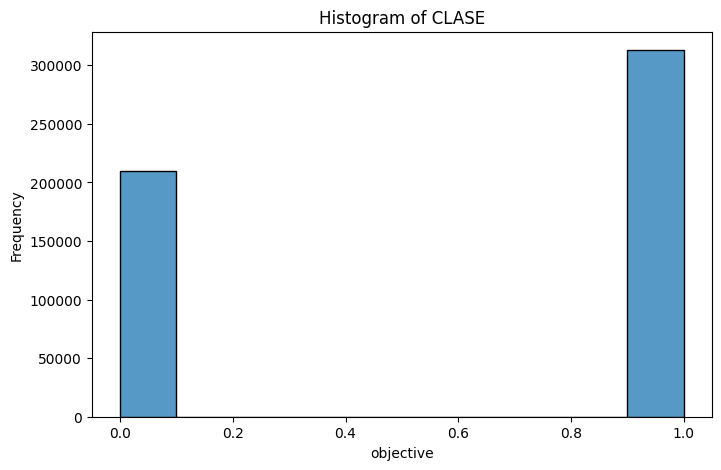

In [46]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada_cleaned['CLASE'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of CLASE')
plt.show()

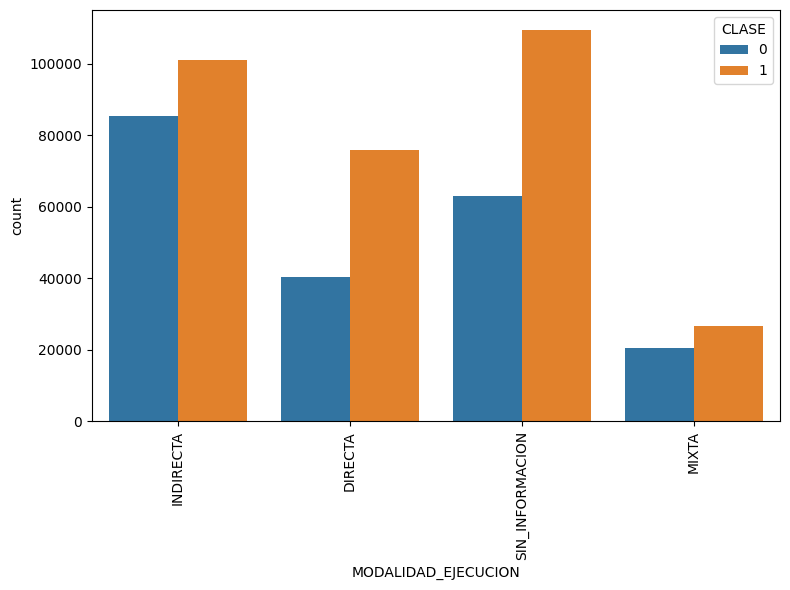

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentamos el ancho para estirar horizontalmente
sns.countplot(
    data=df_entrada_cleaned,
    x='MODALIDAD_EJECUCION',
    hue='CLASE',
    #palette=sns.color_palette("tab10"),
    ax=ax
)
# Rotamos las etiquetas del eje x verticalmente
plt.xticks(rotation=90, ha='center')
# Ajustamos el diseño para que las etiquetas no se corten
plt.tight_layout()
# Mostramos el gráfico
plt.show()

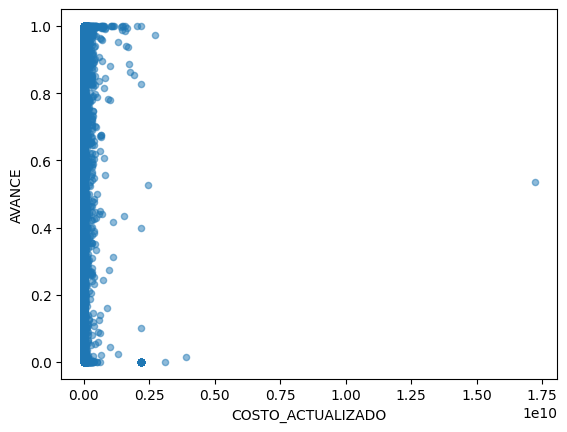

In [48]:
df_entrada_mayor_2021=df_entrada_cleaned.query('ANIO == 2019')
df_entrada_mayor_2021.plot.scatter(x="COSTO_ACTUALIZADO", y="AVANCE", alpha=0.5)
#df_entrada.plot.scatter(x="PUNTAJE_INCO_EJECUTORA", y="AVANCE", alpha=0.1)
plt.show()
#IGEIP_EJECUCION
#NEJE_PUNTAJEIRI
#NRO_EJECUTORAS_X_PROYECTO
#P_INCO_AVG


# PREPARACION DE LOS DATOS

## DROP

In [49]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            #,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            , 'P_INCO_AVG' # Incluido en PUNTAJE_INCO_EJECUTORA
            , 'NEJE_PUNTAJEIRI' # Incluido en NPRY_PUNTAJEIRI
            ]
               
df_entrada_drop = df_entrada_cleaned.drop(col_to_drop, axis='columns', inplace=False)

In [50]:
df_entrada_drop

,NIVEL,DPTO,FUNCION,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,TIPO_GOBIERNO_NACIONAL,...,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,NRO_EJECUTORAS_X_PROYECTO,NPRY_PUNTAJEIRI,PUNTAJE_INCO_EJECUTORA,MONTO_VIABLE,COSTO_ACTUALIZADO,MODALIDAD_EJECUCION,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,CLASE
0,2,1,15,79983,34.90,1,0,0,0,Centro derecha,...,8,0.629,1,55.902316,51.47,7590137.00,9124282.79,INDIRECTA,205,1
1,2,1,15,57539,25.80,1,1,1,0,Izquierda,...,8,0.629,1,55.902316,51.47,7590137.00,9124282.79,INDIRECTA,127,1
2,2,1,15,160000,39.70,2,0,0,0,Centro izquierda,...,8,0.629,1,55.902316,51.47,7590137.00,9124282.79,INDIRECTA,263,1
3,2,1,15,41528,36.10,3,1,0,0,Centro derecha,...,8,0.629,1,55.902316,51.47,7590137.00,9124282.79,INDIRECTA,147,1
4,2,1,15,914962,30.50,1,0,1,0,Centro derecha,...,8,0.629,1,55.902316,51.47,7590137.00,9124282.79,INDIRECTA,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627798,1,15,2,800000,14.20,1,0,1,0,Centro izquierda,...,10,0.635,2,29.744302,61.50,17359084.00,30802474.44,INDIRECTA,5,1
627799,1,15,2,2529872,24.90,2,1,0,1,Izquierda,...,4,0.635,1,35.162257,61.50,49258443.89,71133915.33,DIRECTA,9,0
627800,1,15,2,2118508,14.35,1,0,1,0,Centro derecha,...,4,0.635,1,35.162257,61.50,49258443.89,71133915.33,DIRECTA,5,0
627801,1,15,2,2118508,26.55,3,1,0,0,Centro derecha,...,4,0.635,1,35.162257,61.50,49258443.89,71133915.33,DIRECTA,5,0


## ONE HOT

In [51]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION', 'MODALIDAD_EJECUCION']
df_one_hot = pd.get_dummies(df_entrada_drop, columns=columns_to_one_hot_encode, dtype=int)

In [52]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [34]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PIM                                  627803 non-null  int64  
 1   IP                                   627803 non-null  float64
 2   NRO_PRESIDENTES_X_ANO                627803 non-null  int64  
 3   PANDEMIA                             627803 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL       627803 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL              627803 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO           627803 non-null  int64  
 7   INFLACION_ANUAL                      627803 non-null  float64
 8   PROYECTO_EDAD_NETA                   627803 non-null  int64  
 9   PROYECTO_EDAD_BRUTA                  627803 non-null  int64  
 10  IGEIP_EJECUCION                      627803 non-null  float64
 11  NRO_EJECUTORA

In [57]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522452 entries, 0 to 627802
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PIM                                  522452 non-null  int64  
 1   IP                                   522452 non-null  float64
 2   NRO_PRESIDENTES_X_ANO                522452 non-null  int64  
 3   PANDEMIA                             522452 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL       522452 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL              522452 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO           522452 non-null  int64  
 7   INFLACION_ANUAL                      522452 non-null  float64
 8   PROYECTO_EDAD_NETA                   522452 non-null  int64  
 9   PROYECTO_EDAD_BRUTA                  522452 non-null  int64  
 10  IGEIP_EJECUCION                      522452 non-null  float64
 11  NRO_EJECUTORAS_X_P

## X e y

In [58]:
X = df_one_hot.drop(['CLASE'], axis=1)
y = df_one_hot['CLASE'].values

## Split train and test

In [59]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELING

### RANDOM FOREST

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [61]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7103
Training time: 28.68 seconds
Prediction time: 1.64 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60     62602
           1       0.73      0.82      0.77     94134

    accuracy                           0.71    156736
   macro avg       0.70      0.68      0.69    156736
weighted avg       0.71      0.71      0.70    156736


Confusion Matrix:
[[34564 28038]
 [17367 76767]]


In [66]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating optimized Random Forest model...
Accuracy: 0.7137
Training time: 327.34 seconds
Prediction time: 17.12 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60     62602
           1       0.73      0.83      0.78     94134

    accuracy                           0.71    156736
   macro avg       0.70      0.69      0.69    156736
weighted avg       0.71      0.71      0.71    156736


Confusion Matrix:
[[34089 28513]
 [16354 77780]]


# StandardScaler

## RobustScaler

In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [64]:
# Convertir los resultados a DataFrames si es necesario
X_train_rs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_rs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train_rs, y_train)

c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test_rs)
print(accuracy_score(y_test, prediction_test))

0.6082318772864114


### RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7099
Training time: 28.52 seconds
Prediction time: 1.75 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60     62602
           1       0.73      0.82      0.77     94134

    accuracy                           0.71    156736
   macro avg       0.70      0.68      0.69    156736
weighted avg       0.71      0.71      0.70    156736


Confusion Matrix:
[[34449 28153]
 [17319 76815]]


In [69]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})  

importances_df = importances_df.sort_values('importance', ascending=False)

In [72]:
importances_df.head(20)

,feature,importance
0,PIM,0.119800
15,COSTO_ACTUALIZADO,0.104436
14,MONTO_VIABLE,0.103791
12,NPRY_PUNTAJEIRI,0.099377
16,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,0.082685
13,PUNTAJE_INCO_EJECUTORA,0.076386
9,PROYECTO_EDAD_BRUTA,0.043446
8,PROYECTO_EDAD_NETA,0.041300
1,IP,0.038318
10,IGEIP_EJECUCION,0.030913


#### Optimización

In [68]:
# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating optimized Random Forest model...
Accuracy: 0.7140
Training time: 277.68 seconds
Prediction time: 15.55 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.60     62602
           1       0.73      0.83      0.78     94134

    accuracy                           0.71    156736
   macro avg       0.70      0.69      0.69    156736
weighted avg       0.71      0.71      0.71    156736


Confusion Matrix:
[[34146 28456]
 [16368 77766]]
